In [1]:
import pandas as pd
import numpy as np
import datetime

import missingno as msno
from plotnine import *
import plotly.express as pe
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import warnings
import math
import sqlite3
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.
from sklearn.impute import KNNImputer

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# For evaluating our model's performance
import sklearn.metrics as metrics

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [3]:
Data_Viz_1 = pd.read_csv('Bio_Attendance_Questions_for_modelling.csv')

In [4]:
Data_Viz_1.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'session_no', 'Member_name',
       'Days_attended', 'question_count', 'Gender', 'Whether_Minister',
       'Term_Details', 'Number_of_Terms', 'State_Name', 'Party_Name',
       'Date_of_Birth', 'Marital_Status', 'Educational_Qualification(s)',
       'Education_coded', 'Other_Profession', 'Previous_Membership',
       'Positions_Held', 'Book_Published', 'Activities', 'Hobbies',
       'Country_Visited', 'Essential_Information', 'Unnamed: 0_y',
       'session_name', 'session_end_date', 'session_start_date',
       'Term_start_year', 'seniority', 'Age', 'no_positions_held',
       'no_books_published', 'attendance_rate', 'participation_rate'],
      dtype='object')

In [5]:
Data_Viz_1.head()

,Unnamed: 0,Unnamed: 0_x,session_no,Member_name,Days_attended,question_count,Gender,Whether_Minister,Term_Details,Number_of_Terms,...,session_name,session_end_date,session_start_date,Term_start_year,seniority,Age,no_positions_held,no_books_published,attendance_rate,participation_rate
0,0,0,230,pramod tiwari,3,0.0,0,0,NaN,NaN,...,Winter,2013-12-18,2013-12-05,NaN,NaN,NaN,NaN,NaN,0.3,0.0
1,1,1,230,kanak lata singh,3,0.0,1,0,"4/12/2013 - 04/07/2016 ,",1.0,...,Winter,2013-12-18,2013-12-05,2013-12-04,0.0,NaN,3.0,NaN,0.3,0.0
2,2,2,230,manmohan singh,PM,0.0,0,0,NaN,NaN,...,Winter,2013-12-18,2013-12-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,3,230,ambika soni,9,8.0,0,0,NaN,NaN,...,Winter,2013-12-18,2013-12-05,NaN,NaN,NaN,NaN,NaN,0.9,0.8
4,4,4,230,rajeev shukla,M,0.0,0,0,NaN,NaN,...,Winter,2013-12-18,2013-12-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [6]:
Data_Viz_1['session_no'] = Data_Viz_1['session_no'].astype("category")

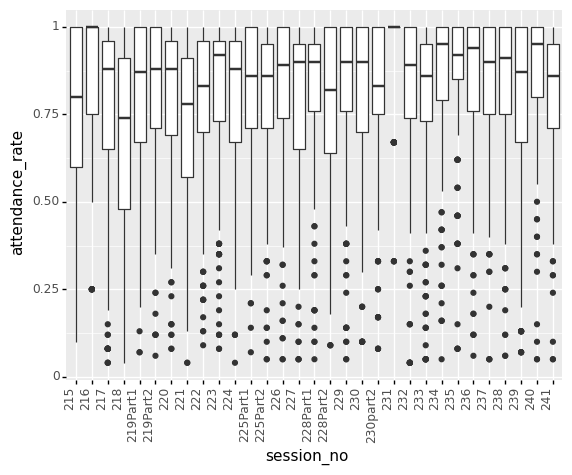

<ggplot: (108885687805)>

In [7]:
ggplot(Data_Viz_1, aes(x='session_no', y='attendance_rate')) + \
    geom_boxplot()+\
theme(axis_text_x = element_text(angle=90, hjust=1))

In [92]:
Data_Viz_2 = Data_Viz_1
Data_Viz_2['attendance_cut'] = pd.cut(Data_Viz_2['attendance_rate'],
                  5, labels=['upto 20%','20% to 40%','40% to 60%', '60% to 80%', '80% to 100%'])
set(Data_Viz_2['attendance_cut'])

{'20% to 40%', '40% to 60%', '60% to 80%', '80% to 100%', nan, 'upto 20%'}

In [93]:
Data_Viz_2.head()

,Unnamed: 0,Unnamed: 0_x,session_no,Member_name,Days_attended,question_count,Gender,Whether_Minister,Term_Details,Number_of_Terms,...,session_end_date,session_start_date,Term_start_year,seniority,Age,no_positions_held,no_books_published,attendance_rate,participation_rate,attendance_cut
0,0,0,230,pramod tiwari,3,0.0,0,0,NaN,NaN,...,2013-12-18,2013-12-05,NaN,NaN,NaN,NaN,NaN,0.3,0.0,20% to 40%
1,1,1,230,kanak lata singh,3,0.0,1,0,"4/12/2013 - 04/07/2016 ,",1.0,...,2013-12-18,2013-12-05,2013-12-04,0.0,NaN,3.0,NaN,0.3,0.0,20% to 40%
2,2,2,230,manmohan singh,PM,0.0,0,0,NaN,NaN,...,2013-12-18,2013-12-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,3,3,230,ambika soni,9,8.0,0,0,NaN,NaN,...,2013-12-18,2013-12-05,NaN,NaN,NaN,NaN,NaN,0.9,0.8,80% to 100%
4,4,4,230,rajeev shukla,M,0.0,0,0,NaN,NaN,...,2013-12-18,2013-12-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [94]:
attendance_cut_count = (Data_Viz_2[['session_no','attendance_cut', 'Member_name']]
             .groupby(['session_no','attendance_cut'])
             .count()
             .reset_index()
             .dropna()
             .reset_index(drop=True))

In [95]:
attendance_cut_count[attendance_cut_count['session_no']=='215']

,session_no,attendance_cut,Member_name
0,215,upto 20%,9
1,215,20% to 40%,24
2,215,40% to 60%,25
3,215,60% to 80%,66
4,215,80% to 100%,90


In [96]:
cat_order = ['80% to 100%','60% to 80%','40% to 60%','20% to 40%','upto 20%']
attendance_cut_count['attendance_cut'] = pd.Categorical(attendance_cut_count['attendance_cut'], categories=cat_order, ordered=True)

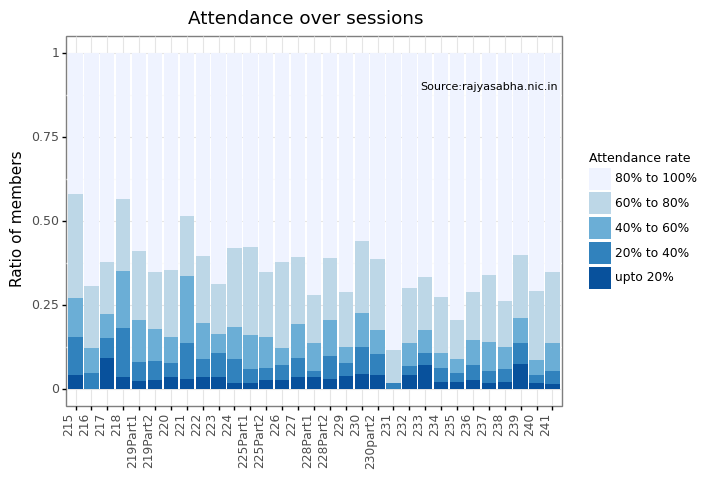

In [105]:
#Change color scheme
#Add percentage labels
#Add Source, Change titles
fig2 =(ggplot(attendance_cut_count, aes('session_no', 'Member_name', fill='attendance_cut'))
 + geom_bar(stat='identity', position='fill')
 + theme_bw()
 + scale_fill_brewer(palette=1)
 + ggtitle('Attendance over sessions')
 + theme(axis_text_x = element_text(angle=90, hjust=1))
 + theme(axis_text_y = element_text(size=9))
 + annotate('text', x='237',y=0.9, label='Source:rajyasabha.nic.in', color='black', size=8)
 + labs(x = None,y="Ratio of members")
 + guides(fill=guide_legend(title="Attendance rate"))
 + theme(legend_title = element_text(size=9))
)
print(fig2)
ggsave(filename = "Attendance_over_sessions", plot = fig2, dpi = 300)

In [14]:
Data_Viz_1.Party_Name.value_counts()

Indian National Congress                    1018
Bharatiya Janata Party                       808
Bahujan Samaj Party                          293
Communist Party of India (Marxist)           235
Nominated                                    163
Independent & Others                         127
Nationalist Congress Party                   117
Samajwadi Party                              115
Biju Janata Dal                              115
Janata Dal (United)                          113
All India Anna Dravida Munnetra Kazhagam     106
Dravida Munnetra Kazhagam                    102
ALL INDIA TRINAMOOL CONGRESS                  81
Communist Party of India                      63
Telugu Desam Party                            54
J&K National Conference                       45
Asom Gana Parishad                            37
Rashtriya Janata Dal                          32
Shiv Sena                                     31
Nagaland Peoples Front                        25
Mizo National Front 

In [15]:
#Change it to Biju Janata Dal
Data_Viz_1[Data_Viz_1['Party_Name']=='CONG(I)']

,Unnamed: 0,Unnamed: 0_x,session_no,Member_name,Days_attended,question_count,Gender,Whether_Minister,Term_Details,Number_of_Terms,...,session_end_date,session_start_date,Term_start_year,seniority,Age,no_positions_held,no_books_published,attendance_rate,participation_rate,attendance_cut
853,853,853,233,bhupinder singh,20,36.0,0,0,"3/04/1970 - 02/04/1976 , 13/10/1976 - 09/04/19...",2.0,...,2014-12-23,2014-11-24,1970-04-03,44.0,NaN,NaN,NaN,0.91,1.64,Very High
2760,2760,2760,234,bhupinder singh,19,25.0,0,0,"3/04/1970 - 02/04/1976 , 13/10/1976 - 09/04/19...",2.0,...,2015-03-20,2015-02-23,1970-04-03,44.0,NaN,NaN,NaN,1.00,1.32,Very High
3483,3483,3483,238,bhupinder singh,16,29.0,0,0,"3/04/1970 - 02/04/1976 , 13/10/1976 - 09/04/19...",2.0,...,2016-03-16,2016-02-23,1970-04-03,45.0,NaN,NaN,NaN,1.00,1.81,Very High
3721,3721,3721,239,bhupinder singh,15,30.0,0,0,"3/04/1970 - 02/04/1976 , 13/10/1976 - 09/04/19...",2.0,...,2016-05-13,2016-04-25,1970-04-03,46.0,NaN,NaN,NaN,1.00,2.00,Very High
4198,4198,4198,232,bhupinder singh,27,38.0,0,0,"3/04/1970 - 02/04/1976 , 13/10/1976 - 09/04/19...",2.0,...,2014-08-14,2014-07-07,1970-04-03,44.0,NaN,NaN,NaN,1.00,1.41,Very High
4435,4435,4435,237,bhupinder singh,17,30.0,0,0,"3/04/1970 - 02/04/1976 , 13/10/1976 - 09/04/19...",2.0,...,2015-12-23,2015-11-26,1970-04-03,45.0,NaN,NaN,NaN,0.85,1.50,Very High
4687,4687,4687,236,bhupinder singh,17,31.0,0,0,"3/04/1970 - 02/04/1976 , 13/10/1976 - 09/04/19...",2.0,...,2015-08-13,2015-07-21,1970-04-03,45.0,NaN,NaN,NaN,1.00,1.82,Very High
4933,4933,4933,235,bhupinder singh,12,15.0,0,0,"3/04/1970 - 02/04/1976 , 13/10/1976 - 09/04/19...",2.0,...,2015-05-13,2015-04-23,1970-04-03,45.0,NaN,NaN,NaN,0.92,1.15,Very High


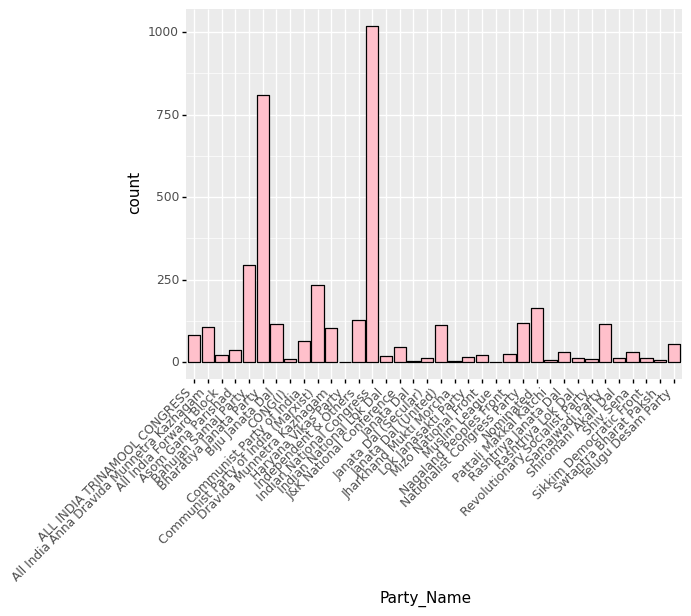

<ggplot: (108889713149)>

In [16]:
Data_Viz_1_notna = Data_Viz_1.dropna(subset=['Party_Name'])
(
    ggplot(Data_Viz_1_notna,aes(x="Party_Name")) +
    geom_bar(color="black", fill="pink") +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)

In [17]:
Data_Viz_1.Party_Name.isna().sum()

3940

In [18]:
Data_Viz_1.shape

(7778, 36)

In [19]:
Data_Viz_3 = pd.read_excel('Political_Parties_meta_data.xlsx')
Data_Viz_3.head()

,Party_Name,Party_Grouping_1,Ideology,Alliance,Party_Grouping_2
0,Indian National Congress,INC,Centre to Centre-left,UPA,INC
1,Bharatiya Janata Party,BJP,Right-wing,NDA,BJP
2,Bahujan Samaj Party,Other National Parties,Centre-left,SAD+ BSP,Other National Parties
3,Communist Party of India (Marxist),Other National Parties,left-wing,Left Front,Other National Parties
4,Nominated,Nominated,Nominated,Nominated,Nominated candiates


In [20]:
Data_Viz_1["Party_Name"].replace({"CONG(I)": "Biju Janata Dal"}, inplace=True)

In [21]:
Data_Viz_1.head()

,Unnamed: 0,Unnamed: 0_x,session_no,Member_name,Days_attended,question_count,Gender,Whether_Minister,Term_Details,Number_of_Terms,...,session_end_date,session_start_date,Term_start_year,seniority,Age,no_positions_held,no_books_published,attendance_rate,participation_rate,attendance_cut
0,0,0,230,pramod tiwari,3,0.0,0,0,NaN,NaN,...,2013-12-18,2013-12-05,NaN,NaN,NaN,NaN,NaN,0.3,0.0,Low
1,1,1,230,kanak lata singh,3,0.0,1,0,"4/12/2013 - 04/07/2016 ,",1.0,...,2013-12-18,2013-12-05,2013-12-04,0.0,NaN,3.0,NaN,0.3,0.0,Low
2,2,2,230,manmohan singh,PM,0.0,0,0,NaN,NaN,...,2013-12-18,2013-12-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,3,3,230,ambika soni,9,8.0,0,0,NaN,NaN,...,2013-12-18,2013-12-05,NaN,NaN,NaN,NaN,NaN,0.9,0.8,Very High
4,4,4,230,rajeev shukla,M,0.0,0,0,NaN,NaN,...,2013-12-18,2013-12-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [22]:
Data_Viz_3 = pd.merge(Data_Viz_1, Data_Viz_3, how='left', on=['Party_Name', 'Party_Name'] )
Data_Viz_3.sample(5)

,Unnamed: 0,Unnamed: 0_x,session_no,Member_name,Days_attended,question_count,Gender,Whether_Minister,Term_Details,Number_of_Terms,...,Age,no_positions_held,no_books_published,attendance_rate,participation_rate,attendance_cut,Party_Grouping_1,Ideology,Alliance,Party_Grouping_2
5668,5668,5668,219Part1,o.t. lepcha,5,0.0,0,0,"4/02/2006 - 23/02/2012 ,",1.0,...,NaN,14.0,7.0,0.33,0.00,Low,North East India,Centre-left to left-wing,Other,Regional parties
788,788,788,233,bhupender yadav,5,1.0,0,0,NaN,NaN,...,NaN,NaN,NaN,0.23,0.05,Very Low,NaN,NaN,NaN,NaN
2349,2349,2349,227,piyush goyal,14,32.0,0,0,NaN,NaN,...,NaN,NaN,NaN,0.70,1.60,High,NaN,NaN,NaN,NaN
6732,6732,6732,215,kusum rai,6,0.0,1,0,"6/11/2008 - 25/11/2014 ,",1.0,...,NaN,20.0,NaN,0.60,0.00,Average,BJP,Right-wing,NDA,BJP
3669,3669,3669,239,rajkumar dhoot,7,36.0,0,0,NaN,NaN,...,NaN,NaN,NaN,0.47,2.40,Average,NaN,NaN,NaN,NaN


In [23]:
Data_Viz_3.Party_Grouping_1.isna().sum()

3940

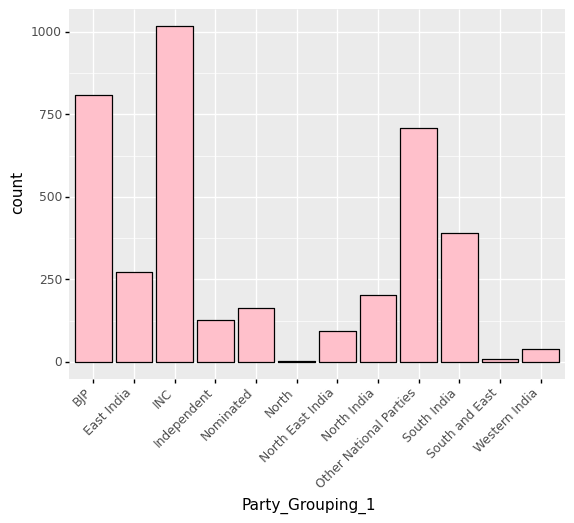

<ggplot: (108890237404)>

In [24]:
Data_Viz_3_notna = Data_Viz_3.dropna(subset=['Party_Grouping_1'])
(
    ggplot(Data_Viz_3_notna,aes(x="Party_Grouping_1")) +
    geom_bar(color="black", fill="pink") +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)

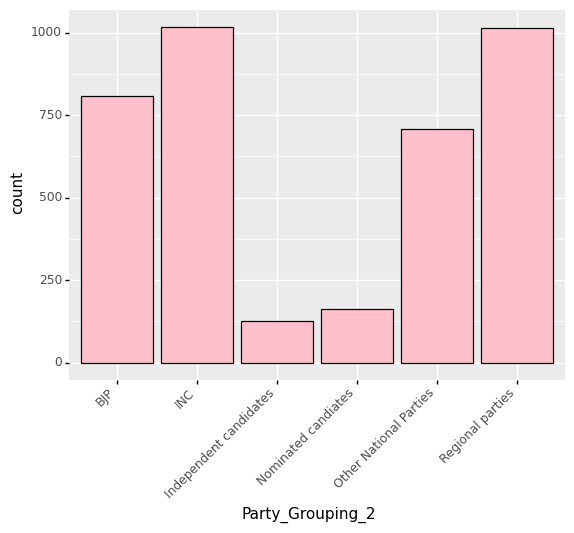

<ggplot: (108889908682)>

In [25]:
(
    ggplot(Data_Viz_3_notna,aes(x="Party_Grouping_2")) +
    geom_bar(color="black", fill="pink") +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)

In [26]:
Data_Viz_3['attendance_cut'] = pd.cut(Data_Viz_3['attendance_rate'],
                  5, labels=['Very Low','Low','Average', 'High', 'Very High'])
set(Data_Viz_3['attendance_cut'])



{'Average', 'High', 'Low', 'Very High', 'Very Low', nan}

In [27]:
attendance_cc_3 = (Data_Viz_3[['session_no','Party_Grouping_2','attendance_cut', 'Member_name']]
             .groupby(['session_no','Party_Grouping_2','attendance_cut'])
             .count()
             .reset_index()
             .dropna()
             .reset_index(drop=True))

cat_order = ['Very High','High','Average','Low','Very Low']
attendance_cc_3['attendance_cut'] = pd.Categorical(attendance_cc_3['attendance_cut'], categories=cat_order, ordered=True)

In [28]:
attendance_cc_3.head()

,session_no,Party_Grouping_2,attendance_cut,Member_name
0,215,BJP,Very Low,0
1,215,BJP,Low,5
2,215,BJP,Average,8
3,215,BJP,High,13
4,215,BJP,Very High,17


In [29]:
attendance_cc_4 = Data_Viz_3[['session_no','Party_Grouping_2','attendance_rate', 'participation_rate', ]]
attendance_cc_4.head()

,session_no,Party_Grouping_2,attendance_rate,participation_rate
0,230,NaN,0.3,0.0
1,230,Regional parties,0.3,0.0
2,230,NaN,NaN,0.0
3,230,NaN,0.9,0.8
4,230,NaN,NaN,0.0


In [30]:
attendance_cc_4 = attendance_cc_4.dropna()

In [31]:
attendance_cc_4.sample(5)

,session_no,Party_Grouping_2,attendance_rate,participation_rate
3753,239,Other National Parties,1.00,2.13
2213,227,INC,0.70,0.00
2936,223,INC,0.92,0.88
174,230,BJP,1.00,0.60
284,220,INC,1.00,0.73


In [32]:
Regional_parties_attendance = attendance_cc_4[attendance_cc_4['Party_Grouping_2']=='Regional Parties'].attendance_rate
INC_attendance = attendance_cc_4[attendance_cc_4['Party_Grouping_2']=='INC'].attendance_rate
Other_National_Parties_attendance = attendance_cc_4[attendance_cc_4['Party_Grouping_2']=='Other National Parties'].attendance_rate
Nominated_attendance = attendance_cc_4[attendance_cc_4['Party_Grouping_2']=='Nominated candidates'].attendance_rate
Independent_attendance = attendance_cc_4[attendance_cc_4['Party_Grouping_2']=='Independent candidates'].attendance_rate
BJP_attendance = attendance_cc_4[attendance_cc_4['Party_Grouping_2']=='BJP'].attendance_rate

In [33]:
hist_data = [Regional_parties_attendance, INC_attendance, Other_National_Parties_attendance, Nominated_attendance, BJP_attendance] 
group_labels = ['Regional parties', 'INC', 'Other National Parties', 'Nominated & Independent candidates', 'BJP']
colors = ['#333F44', '#37AA9C', '#94F3E4', '#ff7f0e', '#2ca02c']
#colors = ['#333F44', '#37AA9C', '#94F3E4']
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
fig.update_layout(title_text='Curve and Rug Plot')
fig.show()

ValueError: min() arg is an empty sequence

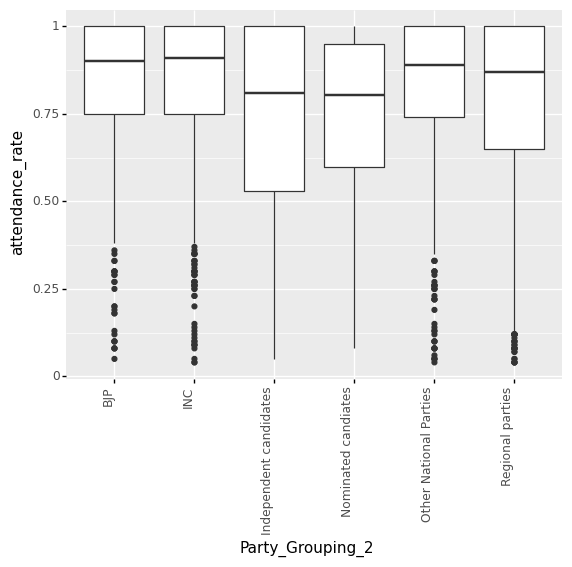

<ggplot: (108890778236)>

In [35]:
ggplot(attendance_cc_4, aes(x='Party_Grouping_2', y='attendance_rate')) + \
    geom_boxplot()+\
theme(axis_text_x = element_text(angle=90, hjust=1))

In [36]:
def plot(session):
    fig=(
        ggplot(attendance_cc_4[attendance_cc_4['session_no']==session], aes(x='Party_Grouping_2', y='attendance_rate')) + \
        geom_boxplot()+\
        theme(axis_text_x = element_text(angle=90, hjust=1))
    )
    print(fig)

In [37]:

session_nos=list(set(attendance_cc_4['session_no']))
interact(plot, session=session_nos)

interactive(children=(Dropdown(description='session', options=('227', '222', '228Part1', '216', '217', '237', …

<function __main__.plot(session)>

In [118]:
def plot(session):
    fig=(
        ggplot(attendance_cc_4[attendance_cc_4['session_no']==session], aes(x='Party_Grouping_2', y='attendance_rate', color='Party_Grouping_2')) + \
        geom_boxplot(fill="lightyellow")+
        #theme(axis_text_x = element_text(angle=90, hjust=1))+
        theme_bw()+
        ggtitle("Attendance Rate by Party Grouping")+
        theme(axis_text_x = element_blank())+
        theme(axis_text_y = element_text(size=9))+
        annotate('text', x='INC',y=0.15, label='Source:rajyasabha.nic.in', color='black', size=9)+
        labs(x = None,y="Attendance Rate")+
        theme(legend_title = element_blank())
        
    )
    ggsave(filename = "Attendance_plot", plot = fig, dpi = 300)
    print(fig)
    
interact(plot, session=session_nos)

interactive(children=(Dropdown(description='session', options=('227', '222', '228Part1', '216', '217', '237', …

<function __main__.plot(session)>

In [39]:
display(interact(plot, session=session_nos))

interactive(children=(Dropdown(description='session', options=('227', '222', '228Part1', '216', '217', '237', …

<function __main__.plot(session)>

In [117]:
def plot(session):
    fig=(
        ggplot(attendance_cc_4[attendance_cc_4['session_no']==session], aes(x='Party_Grouping_2', y='participation_rate', color='Party_Grouping_2')) + \
        geom_boxplot(fill="lightgrey")+
        #theme(axis_text_x = element_text(angle=90, hjust=1))+
        theme_bw()+
        ggtitle("Participation Rate by Party Grouping")+
        theme(axis_text_x = element_blank())+
        theme(axis_text_y = element_text(size=9))+
        annotate('text', x='INC',y=2, label='Source:rajyasabha.nic.in', color='black', size=9)+
        labs(x = None,y="Participation Rate")+
        theme(legend_title = element_blank())
        
    )
    ggsave(filename = "Participation_plot", plot = fig, dpi = 300)
    print(fig)
    
interact(plot, session=session_nos)

interactive(children=(Dropdown(description='session', options=('227', '222', '228Part1', '216', '217', '237', …

<function __main__.plot(session)>